<center style="font-size: 50px; background-color:lightskyblue;blue; font-family:Georgia">
Predict the age of sea slugs using KNN
</center>

# Fit kNN in Python Using Pure Python

## Import dataset

In this tutorial, you’ll work with the Abalone Dataset. You could download it and use pandas to import the data into Python, but it’s even faster to let pandas import the data directly for you.

In [142]:
import pandas as pd

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header = None)
abalone.columns = [
     "Sex",
     "Length",
     "Diameter",
     "Height",
     "Whole weight",
     "Shucked weight",
     "Viscera weight",
     "Shell weight",
     "Rings"]

In [143]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


The goal of the current exercise is to use physical measurements to predict the age of the abalone. Since `sex` is not a purely physical measure, you should remove it from the dataset. You can delete the `Sex` column using `.drop`

In [144]:
abalone = abalone.drop('Sex',axis =1) 
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Descriptive Statistics From the Abalone Dataset

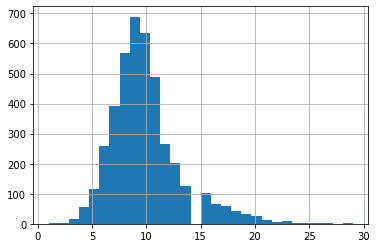

<Figure size 432x288 with 0 Axes>

In [164]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=30)
plt.show()
plt.savefig('Descriptive Statistics From the Abalone Dataset.png')

The histogram shows that most abalones in the dataset have between five and fifteen rings, but that it’s possible to get up to twenty-five rings. 

In [146]:
corr_matrix = abalone.corr()
corr_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [147]:
X = abalone.drop("Rings", axis= 1)
X= X.values
y = abalone["Rings"]
y = y.values
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [148]:
y

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

Now you can apply a kNN with k = 3 on a new abalone that has the following physical measurements:

* Length = 0.569552
* Diameter = 0.446407
* Height = 0.154437
* Whole weight = 1.016849
* Shucked weight = 0.439051
* Viscera weight = 0.222526
* Shell weight = 0.291208

In [149]:
import numpy as np 
new_point = np.array([ 
  0.569552
, 0.446407
, 0.154437
, 1.016849
, 0.439051
, 0.222526
, 0.291208])

In [150]:
distance = np.linalg.norm(X - new_point, axis=1)
distance

array([0.59739395, 0.9518455 , 0.40573594, ..., 0.20397872, 0.14342627,
       1.10583307])

In [151]:
k = 3
nearest_neighbor_ids = distance.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644], dtype=int64)

you now need to combine those neighbors into a prediction for your new data point.

## Voting or Averaging of Multiple Neighbors

In [152]:
nearest_neighbor = y[nearest_neighbor_ids]
nearest_neighbor

array([ 9, 11, 10], dtype=int64)

## Average for Regression
Combine multiple neighbors into one prediction by taking the average of their values of the target variable.

In [153]:
y_pred = nearest_neighbor.mean()
y_pred

10.0

# Fit kNN in Python Using scikit-learn
It’s usually not very practical when working on a machine learning task. In this section, you’ll explore the implementation of the kNN algorithm used in scikit-learn, one of the most comprehensive machine learning packages in Python.

## Splitting Data Into Training and Test Sets for Model Evaluation

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2022)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3341, 7)
X_test shape: (836, 7)
y_train shape: (3341,)
y_test shape: (836,)


## Fitting a kNN Regression in scikit-learn 

In [155]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors= 3)
knn_reg

KNeighborsRegressor(n_neighbors=3)

In [156]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

## Evaluation Metrics

In [157]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds = knn_reg.predict(X_train)
mse_train = mean_squared_error (y_train, train_preds)
rmse_train = sqrt(mse_train)
print(f"RMSE of training set: {rmse_train}")


test_preds = knn_reg.predict(X_test)
mse_test = mean_squared_error (y_test, test_preds)
rmse_test = sqrt(mse_test)
print(f"RMSE of testing set: {rmse_test}")


RMSE of training set: 1.6185101104261386
RMSE of testing set: 2.512726776485963


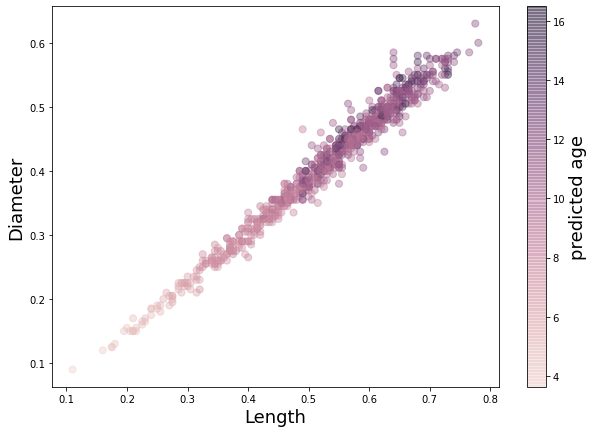

<Figure size 432x288 with 0 Axes>

In [165]:
import seaborn as sns
cmap = sns.cubehelix_palette (as_cmap = True)
fig, ax = plt.subplots(figsize = (10,7))
points = ax.scatter(X_test[:, 0], X_test[:, 1], c = test_preds, s = 50, cmap = cmap, alpha = 0.4)
ax.set_xlabel("Length", fontsize = 18)
ax.set_ylabel("Diameter", fontsize = 18)
cb = fig.colorbar(points)
cb.set_label("predicted age", fontsize = 18)
plt.show()
plt.savefig('Length and Diameter of the Abalone Dataset.png')

* The first two columns are Length and Diameter. They are strongly correlated
* The color of the point reflects the predicted age.

## Tune and Optimize kNN in scikit-learn Using GridSearchCV

In [159]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors": range(1,50)}
          #,"weights": ['uniform', 'distance']}
gridsearch = GridSearchCV(KNeighborsRegressor(), params)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [160]:
gridsearch.best_params_

{'n_neighbors': 24}

In [161]:
train_preds = gridsearch.predict(X_train)
mse_train = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_train)
print(f"RMSE of training set using GridSearch CV: {rmse_train}")

test_preds = gridsearch.predict(X_test)
mse_test = mean_squared_error (y_test, test_preds)
rmse_test = sqrt(mse_test)
print(f"RMSE of testing set using GridSearch CV: {rmse_test}")


RMSE of training set using GridSearch CV: 2.043111682630269
RMSE of testing set using GridSearch CV: 2.3037212855933564


## Further Improving on kNN in scikit-learn With Bagging

Bagging is an ensemble method, or a method that takes a relatively straightforward machine learning model and fits a large number of those models with slight variations in each fit.

In [162]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_Knn, n_estimators=100)
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=24,
                                                    weights='distance'),
                 n_estimators=100)

In [163]:
train_preds = bagging_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_train)
print(f"RMSE of training set using bagging Regressor and GridSearch CV: {rmse_train}")

test_preds = bagging_model.predict(X_test)
mse_test = mean_squared_error (y_test, test_preds)
rmse_test = sqrt(mse_test)
print(f"RMSE of testing set using bagging Regressor and GridSearch CV: {rmse_test}")


RMSE of training set using bagging Regressor and GridSearch CV: 0.7833526027921025
RMSE of testing set using bagging Regressor and GridSearch CV: 2.2920417700507625
